# Evaluating Design Complexity: Coupling and Cohesion

- We previously talked about design principles useful in object oriented design
    - abstraction, encapsulation, decomposition, generalizatoin

- We also talked about expressing these concepts as UML diagram

- Now, we talk about guidelines to **evaluate** the design of your software solution. Objective is to make your software
    - Flexible
    - Reusable
    - Maintainable

- We also talk about using UML state and UML sequence diagrams 

- Average person holds ~7 things in short term memory, so design complexity must be minimised
- Metrics used to evaluate design complexity are coupling and cohesion
    - Coupling
        - Complexity between module and other modules
    - Cohesion
        - Complexity within a module

- Good vs bad design
    - Good design: Lego, each piece can fit with many other pieces seamlessly
    - Bad design: Jigsaw puzzles; each piece can only fit with one other piece
    - If your module is highly reliant on other modules, it is **tightly coupled**. Else, it is **loosely coupled**

- Coupling: When evaluating coupling, you consider 3 things
    - Degree
        - Number of connections between module and others
        - You want this to be as small as possible
    - Ease
        - How obvious are the connections between module and others
        - You want connections to be easy to make without needing to understand implementation of the other modules
    - Flexibility
        - How interchangeable the other modules are for this module
        - You want other modules to be easily replaceable so you can improve things in future

- Cohesion: Clarity of the responsibilities of a module
    - If your module has a clear purpose, cohesion is high. Else low (i.e. module has multiple responsibilities)


- Example: Let's say we have a class called "sensor" whose jobs are (i) get humidity value, (ii) get temperature value
    - Let's suppose we implement the `Sensor` class with a `get()` method which accepts a flag argument. If flag is 0, return humidity, if flag is 1, return temperature
        - Cohesion: Not very coherent. 1 module does 2 things
        - Coupling: Coupling is tight, because the get method is not straightforward. Users need to break it open to see how it works, and any caller will need to be **tightly coupled** to it

    - Let's suppose we implement the `Sensor` as an interface with a `get()` abstract method. We then have `HumiditySensor()` and `TemperatureSensor()` classes, which implements the `get()` method from the interface 
        - Cohesion: Highly conhesive. Each module does 1 thing
        - Coupling: Coupling is loose, because it does not rely on anything outside of itself, and is easily used by other modules 

# Separation of Concerns

- A concern anything that matters in providing a solution to a problem
    - e.g. In a supermarket, concerns could be "how do I accept payment", "how do I bake" etc. Separate departments to deal with these concerns and their subproblems 

- The abstraction of concerns can lead to more concerns, which may involve
    - What information the implementation represents
    - What it manipulates
    - What gets presented in the end

- As such, it is important to separate these concerns into subproblems to be dealt with 

### Example 

- We want to model a dog, which has the ability to eat food. Let's explore implementations

In [5]:
class Food:
    def __init__(self, name: str):
        self.name=name

class Dog:
    def __init__(self, name: str, food: Food):
        self.name: str = name
        self.food: Food = food
    
    def eat_food(self):
        print(f'Eating food: {self.food.name}')


- Is this the best way to do it? Does the dog always have food? Does the dog always know what food it is eating?
- Clearly there are 2 concerns here
    - Dog class must know what food it is eating
    - Dog class must be able to `eat_food`
- As such, SRP is violated
- It is better to have a new class to handle the responsibility of the getting the food to the dog, and letting the dog handle eating the food


In [ ]:
class Food:
    def __init__(self, name: str):
        self.name=name
    
class Dog:
    def __init__(self, name: str, food: Food):
        self.name: str = name
        self.food: Food = food

    def eat_food(self) -> None:
        print(f'Eating food: {self.food.name}')

class DogOwner:
    def __init__(self, my_dog: Dog, dog_food: Food):
        self.my_dog = my_dog
        self.dog_food = dog_food

    def feed_dog(self) -> str:
        ... 
    
    def buy_dog_food(self, food: Food) -> str:
        ...

### Example 2

- Think about a smartphone. What would the classes look like if we were to design a smartphone?


In [ ]:
class Smartphone:
    def __init__(self, camera, phone):
        self.camera=camera
        self.phone=phone
    
    def take_photo(self):
        ...

    def save_photo(self):
        ...

    def camera_flash(self):
        ...

    def make_call(self):
        ...

    def encrypt_outgoing_call(self):
        ...

    def decrypt_incoming_call(self):
        ...

- This design works, but...
    - Cohesion is low: 
        - Camera behaviour encapsulated with phone behaviour
        - Low modularity. I cannot re-use the camera component in a new phone. I cannot swap out the camera for another camera

- Let's think about the concerns that a Smartphone class has
    - Act as a traditional phone
    - Take pictures using the built in camera

- Now that the concerns are clear, we can separate them out into their own classes and encapsulate details about each 

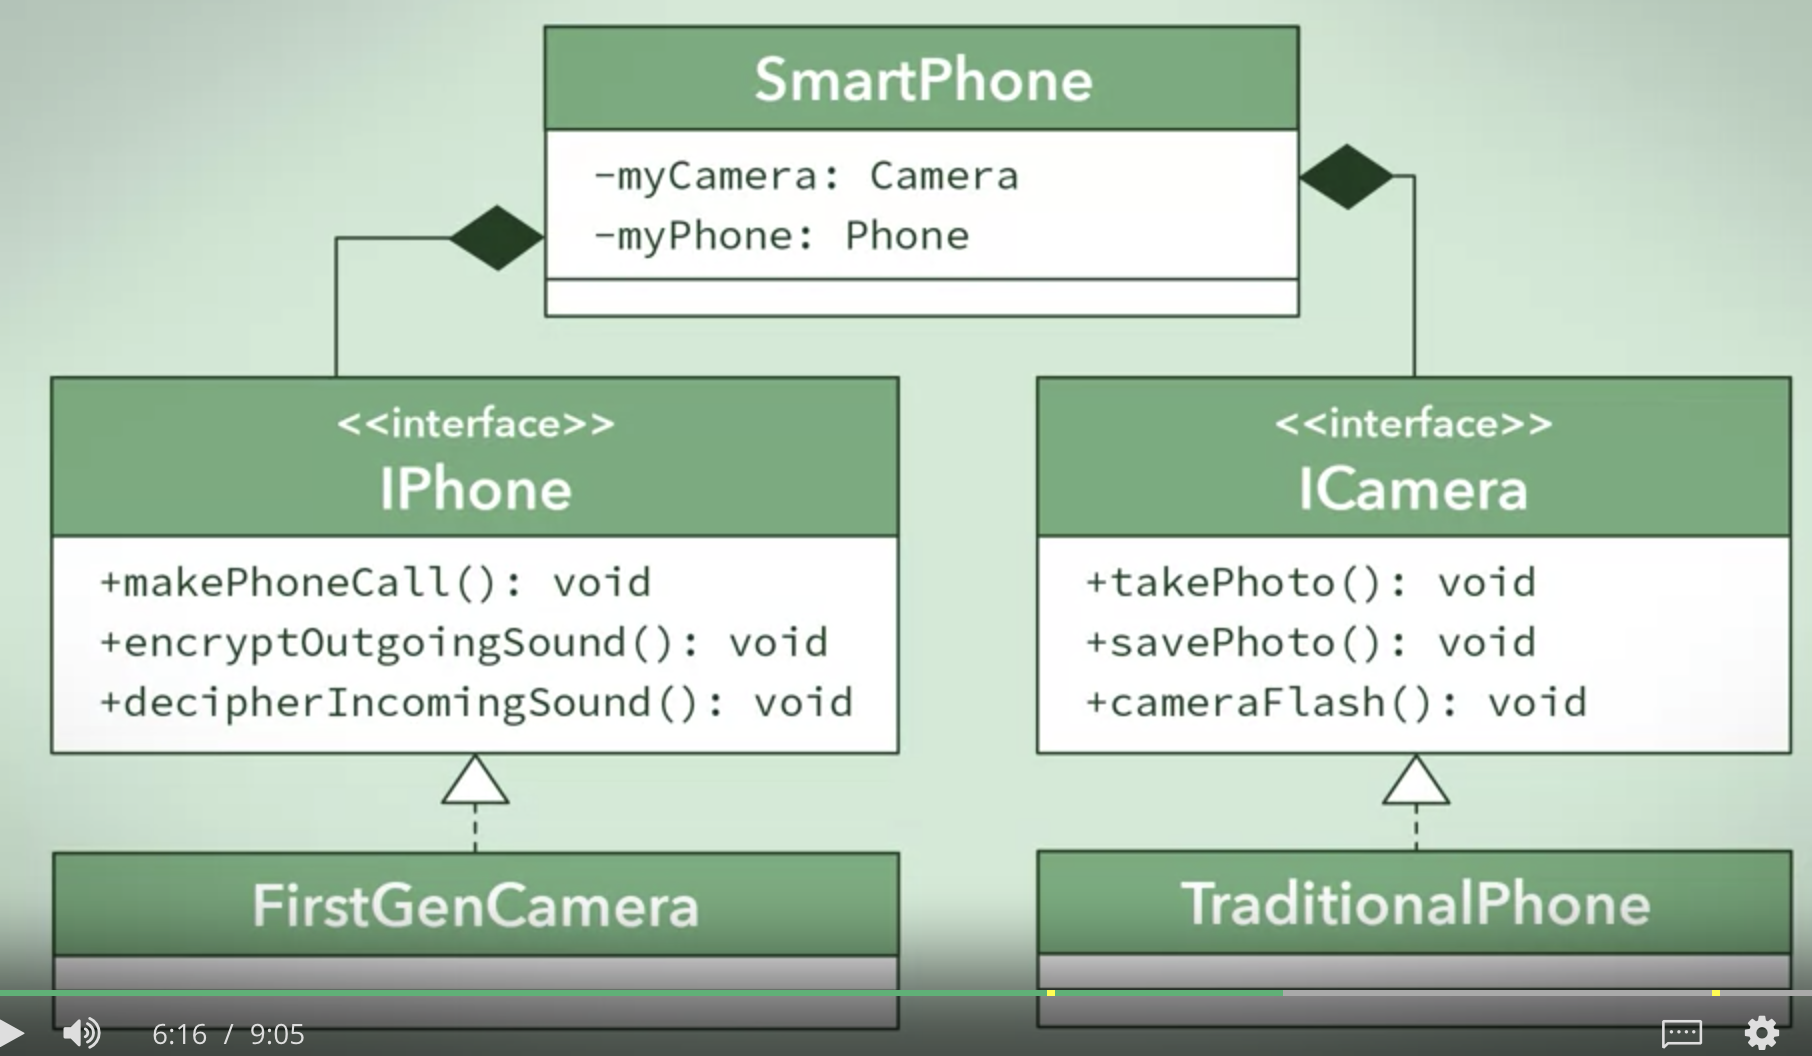

In [ ]:
import abc

class ICamera(metaclass=abc.ABCMeta):
    
    @abc.abstractmethod
    def takePhoto(self):
        raise NotImplementedError

    @abc.abstractmethod
    def savePhoto(self):
        raise NotImplementedError

    @abc.abstractmethod
    def cameraFlash(self):
        raise NotImplementedError


class IPhone(metaclass=abc.ABCMeta):
    
    @abc.abstractmethod
    def makePhonecall(self):
        raise NotImplementedError

    @abc.abstractmethod
    def encryptSound(self):
        raise NotImplementedError

    @abc.abstractmethod
    def decryptSound(self):
        raise NotImplementedError

class FirstGenCamera(ICamera):
    def takePhoto(self):
        ...

    def savePhoto(self):
        ...

    def cameraFlash(self):
        ...

class TraditionalPhone(ICamera):
    def makePhonecall(self):
        ...

    def encryptSound(self):
        ...

    def decryptSound(self):
        ...

class SmartPhone:
    def __init__(self, camera: ICamera, phone: IPhone):
        self.camera = camera
        self.phone = phone

    def useCamera(self):
        return self.camera.takePhoto()

    def usePhone(self):
        return self.phone.makePhonecall()

# Information Hiding

- Well designed systems require information to be well organised
- How to limit amount of information the various modules of your system can access? --> Information hiding

- Rule of thumb
    - Things that might change (e.g. implementation details) should be hidden
    - Things that don't change (e.g. assumptions) are revealed through interfaces

- Usually associated with encapsulation, where information and behaviours are bundled into appropriate classes
- **Access modifiers** will help manage access to attributes and behaviours, and determine what gets shared between superclass and subclass. There are 4 levels of access in Java
    - Public
    - Protected
    - Default
    - Private

| | Class | Package | Subclass (same pkg) | Subclass (diff pkg) | World |
| -- | -- | -- | -- | -- | -- |
| public | + | + | + | + | + |
| protected | + | + | + | +	| |
| no modifier | + | + | + | | |
| private | + | | | | |


# Conceptual Integrity

- It is about creating consistent software
    - Maintaining common naming conventions, syntax etc

- Code reviews will help maintain consistency

- Interfaces also helps maintain consistency

- Having core group that approves all commits to code base 